In [0]:
# this is used to load the package, and name it as "pd" for short.
import pandas as pd

In [52]:
# Not going to explain this 
# Selection Titanic Train dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))

Saving titanic.csv to titanic (1).csv


In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
# Feature Engineering

# Gender
df['Gender'] = 0
df.loc[df['Sex'] == 'male', 'Gender'] = 1

# Family
df['Family'] = df['SibSp'] + df['Parch']

# Child
df['Child'] = 0
df.loc[df['Name'].str.contains('Master'), 'Child' ] = 1

# Null handling in Age
age_mode = df['Age'].mode()[0]
df['Age'].fillna(age_mode, inplace = True)

dfs = df[['Survived', 'Pclass', 'Age', 'Fare', 'Gender', 'Child', 'Family']]
print(dfs.isnull().sum())


Survived    0
Pclass      0
Age         0
Fare        0
Gender      0
Child       0
Family      0
dtype: int64


In [55]:
dfs.head()

,Survived,Pclass,Age,Fare,Gender,Child,Family
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,1
2,1,3,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,0


In [56]:
# Training & Test Data
y = dfs['Survived']
x = dfs.drop(['Survived'], axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train.shape, x_test.shape)
print(y_train.mean(), y_test.mean())

(712, 6) (179, 6)
0.37640449438202245 0.4134078212290503


In [57]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 2, criterion='entropy')
model = model.fit(x_train, y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, log_loss
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8033707865168539
0.7653631284916201


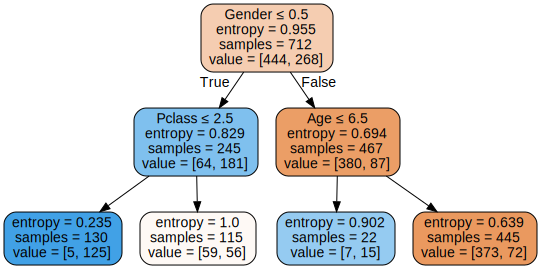

In [58]:
# Visualize
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=x_test.columns)  
graph = graphviz.Source(dot_data)  
graph

In [59]:
model.feature_importances_

array([0.24913067, 0.08629199, 0.        , 0.66457735, 0.        ,
       0.        ])

In [60]:
x_train.columns

Index(['Pclass', 'Age', 'Fare', 'Gender', 'Child', 'Family'], dtype='object')

In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, train_pred))
# tn, fp
# fn, tp

[[432  12]
 [128 140]]


Dataset 2


In [0]:
# Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
x, y = load_breast_cancer(return_X_y = True)
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [75]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [76]:
y.mean()

0    0.627417
dtype: float64

In [77]:
# Training & Test Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train.shape, x_test.shape)
print(y_train.mean())

(455, 30) (114, 30)
0    0.628571
dtype: float64


In [78]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 4, criterion='entropy')
model = model.fit(x_train, y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, log_loss
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.9912087912087912
0.956140350877193


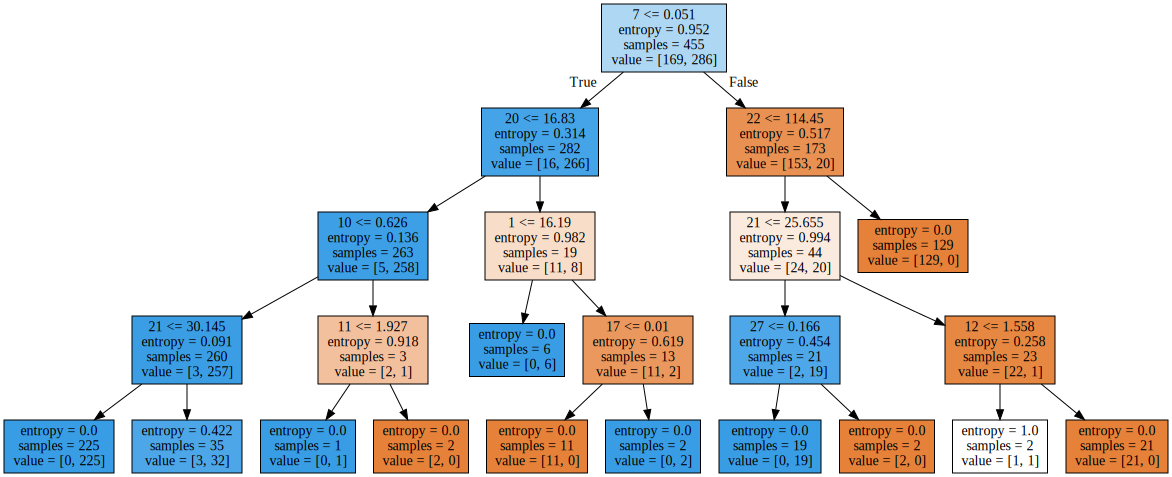

In [79]:
# Visualize
import graphviz 
dot_data = tree.export_graphviz(model, filled=True,  feature_names=x_test.columns)  
graph = graphviz.Source(dot_data)  
graph

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.61264211, 0.        , 0.        ,
       0.02248308, 0.        , 0.00945136, 0.        , 0.        ,
       0.        , 0.        , 0.01934258, 0.        , 0.00661784,
       0.08230492, 0.11464579, 0.10962389, 0.        , 0.        ,
       0.        , 0.        , 0.02288843, 0.        , 0.        ])

In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, train_pred))
# tn, fp
# fn, tp

[[432  12]
 [128 140]]
